# Deep Learning Algoritmaları ile Fotoğraflardaki Nesneleri Tanıma ve Sınıflandırma Projesi

<IMG src="cifar10_images.jpg" width="400" height="400"> kodumuzda isimleri 0 ila 9 arasında sayı olarak sınıflanfırılmıştır.

<IMG src="deep7.png" width="750" height="180">

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-09-29 13:27:45.595612: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 13:27:45.948511: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-29 13:27:45.950878: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-29 13:27:47.569584: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape   #32 piksele 32 piksel kare boyutunda 3 kanallı

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:3]  #ilk üç görselimiz ne? frog, truck, truck

array([[6],
       [9],
       [9]], dtype=uint8)

In [6]:
# cifar10 datasetinde y_train ve y_test iki boyutlu bir array olarak tutuluyor.
# görselleri daha rahat anlayabilmek için tek boyuta indirgiyoruz.

y_test = y_test.reshape(-1,)

In [7]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [8]:
#sınıflandırmamızın isimlerini array halinde oluşturuyoruz

resim_siniflari = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))  #figürün genişliği 15 birim, yüksekliği ise 2 birim olarak ayarlanmıştır. 
    plt.imshow(X[index])  #X adı verilen bir veri setinde bulunan bir örneği belirtilen index pozisyonundan alır ve bu örneği görselleştirir.
    plt.xlabel(resim_siniflari[y[index]]) #y içindeki örneğin sınıfını alır ve bu sınıfın adını x-eksenine (başlık olarak) ekler. 
    plt.show()

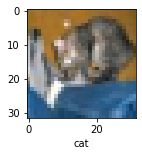

In [10]:
plot_sample(X_test, y_test, 0) 

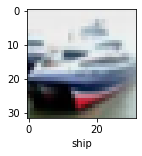

In [11]:
plot_sample(X_test, y_test, 1)

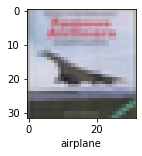

In [12]:
plot_sample(X_test, y_test, 3)

##### NORMALIZATION
CNN algoritmaları yanlış sonuç vermemesi için normalization yapmamız gerekiyor.

Fotoğraflar RGB olarak 3 kanal ve her pixel 0-255 arası değer aldığı için normalization için her bir pixel 255'e bölünmelidir.

In [13]:
X_train = X_train / 255
X_test = X_test / 255

### CNN(Convolutional Neural Network)

In [14]:
deep_learning_model = models.Sequential([  #Sequential modeli, ardışık katmanların bir araya getirilmesini kolaylaştıran bir model tipidir. Bu modelde katmanlar sırayla eklenir.
    
    #İlk Bölüm (Convolution Layer ve Max Pooling Layer):  Bu kısımda fotoğraflardan tanımlama yapabilmek için özellikleri(feature) çıkarıyoruz
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    #layers.Conv2D: İlk katman, 2D konvolüsyon işlemi uygular. filters parametresi, bu katmanda kullanılacak filtre sayısını belirtir.
    # kernel_size, her filtre için kullanılacak çekirdek boyutunu belirtir. activation, bu katmandan çıkış olarak elde edilen özellik haritasına
    # uygulanacak aktivasyon fonksiyonunu belirtir. input_shape, modelin girdi verisinin şeklini tanımlar. Burada, girdi boyutu 32x32 piksel ve 3 kanallı bir görüntüdür.
    layers.MaxPooling2D((2, 2)),
    #layers.MaxPool2D: Bu katman, özellik haritasını boyutunu küçültmek ve özellikleri özetlemek için maksimum havuzlama işlemini uygular.
    #  (2, 2) parametresi, her iki boyutta da boyutu yarıya indirecek bir havuzlama işlemi uygulanacağını belirtir.

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # İkinci bir evrişim katmanı eklenir. Bu katman da benzer şekilde çalışır, ancak daha fazla filtre kullanır.
    layers.MaxPooling2D((2, 2)), #İkinci evrişim katmanının ardından bir maksimum havuzlama katmanı daha eklenir.


    #İkinci Bölüm (Fully Connected Layer - Tam Bağlantılı Katmanlar):  Yukarıdaki özelliklerimiz ve training bilgilerine göre ANN modelimizi eğiteceğiz.
    layers.Flatten(),  # Önceki Convolutional ve Max Pooling katmanlarından gelen özellik haritasını bir düz vektöre dönüştüren Flatten katmanı.
    layers.Dense(64, activation='relu'), #İlk tam bağlantılı (fully connected) katman eklenir. Bu katman 64 nöron içerir ve "relu" aktivasyon fonksiyonu kullanır.
    layers.Dense(10, activation='softmax') #çıkış katmanı eklenir. Bu katman 10 nöron içerir, çünkü bu modelin sınıflandırma yapması amaçlanmıştır
    # (10 sınıf için). "softmax" aktivasyon fonksiyonu, çıkışları sınıflara ait olasılık dağılımlarına dönüştürür.
    # Bu, çoklu sınıf sınıflandırma problemleri için yaygın bir yapıdır ve çıkış katmanı, her sınıf için olasılık dağılımlarını hesaplar. 

])

2023-09-29 13:27:55.488292: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-29 13:27:55.490475: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [15]:
#derin öğrenme modelin derleme (compilation) aşamasını tanımlar. Derleme, modelin nasıl eğitileceğini ve değerlendirileceğini belirler. 

deep_learning_model.compile(optimizer='adam',  # Optimizasyon algoritmasını belirtir. Bu kodda "adam" optimizasyon algoritması kullanılır. Adam, gradient tabanlı optimizasyon yöntemlerinden biridir ve genellikle derin öğrenme modellerinde tercih edilir.
                            loss='sparse_categorical_crossentropy', #Kayıp fonksiyonunu belirtir. Bu kodda "sparse_categorical_crossentropy" kullanılır. Bu, çoklu sınıf sınıflandırma problemleri için yaygın bir kayıp fonksiyonudur. Verilerin sınıf etiketleri sayısal olarak temsil edildiği için "sparse" (seyrek) sürümü kullanılır.
                            metrics=['accuracy'])  #Eğitim ve değerlendirme sırasında izlenecek metrikleri belirtir. Bu kodda sadece "accuracy" (doğruluk) metriği kullanılır. Doğruluk, modelin sınıflandırma doğruluğunu izlemek için kullanılan bir metriktir.




#### eğitim aşaması

deep_learning_model.fit(X_train, y_train, epochs=5): Bu satırda fit yöntemi çağrılır ve üç ana argüman ile çağrılır:

X_train: Eğitim verileri. Modelin eğitimi için kullanılacak görüntülerin oluşturduğu veri kümesini temsil eder.

y_train: Eğitim verilerinin etiketleri. Her bir görüntünün hangi sınıfa ait olduğunu belirten sınıf etiketlerini içerir.

epochs=5: Eğitim döngüsünün kaç kez tamamlanacağını belirtir. Burada, 5 epok (5 tam eğitim döngüsü) boyunca modelin eğitilmesi planlanmıştır. Bir epok, tüm eğitim verilerinin bir kez model üzerinden geçirilmesini temsil eder.

Bu kod, modelinizi eğitmek için kullanılır. Her epok boyunca, model veriler üzerinden geçirilir, kayıp fonksiyonu hesaplanır ve modelin ağırlıkları güncellenir. Eğitim işlemi tamamlandığında, modelin sınıflandırma görevini daha iyi yapabilmesi beklenir.

In [16]:
deep_learning_model.fit(X_train, y_train, epochs=5)

2023-09-29 13:27:58.852336: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4824 - accuracy: 0.4636
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.1235 - accuracy: 0.6064
Epoch 3/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9921 - accuracy: 0.6542
Epoch 4/5
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9074 - accuracy: 0.6849
Epoch 5/5
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8390 - accuracy: 0.7100


`evaluate` yöntemi, modelin performansını belirli bir veri kümesi üzerinde değerlendirmek için kullanılır. 

deep_learning_model.evaluate(X_test, y_test): Bu satırda evaluate yöntemi çağrılır ve iki ana argüman ile çağrılır:

X_test: Test verileri. Modelin performansının değerlendirilmesi için kullanılacak olan test görüntülerini temsil eder.

y_test: Test verilerinin etiketleri. Her bir test görüntüsünün gerçek sınıf etiketlerini içerir.

Bu kod, modelin test verileri üzerinde performansını değerlendirmek için kullanılır. evaluate yöntemi, test verileri üzerinde modelin tahminlerini yapar, belirtilen kayıp fonksiyonunu hesaplar ve belirtilen metrikleri hesaplar. Bu metrikler, modelin sınıflandırma doğruluğu, kayıp değeri veya diğer özel metrikler olabilir.

evaluate yöntemi, modelin test verileri üzerindeki başarısını değerlendirmek için kullanışlı bir araçtır ve modelin gerçek dünya verilerinde nasıl performans gösterdiğini anlamak için kullanılır. Bu işlem sonucunda, modelin test verileri üzerindeki performansını gösteren bir çıktı döner.

In [17]:
deep_learning_model.evaluate(X_test, y_test)

2023-09-29 13:44:34.815108: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 6ms/step - loss: 0.9265 - accuracy: 0.6883


[0.9265215992927551, 0.6883000135421753]

In [18]:
y_pred = deep_learning_model.predict(X_test)  #eğitilmiş model olan deep_learning_model kullanılarak test verileri X_test üzerinde tahminler yapılır. predict yöntemi, modelin girdi verileri üzerinde tahminler üretir.
y_pred[:3]  # tahmin edilen sonuçlardan ilk üçü

  9/313 [..............................] - ETA: 1s 

2023-09-29 13:45:35.620221: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 6ms/step


array([[6.18926832e-04, 3.83512903e-04, 1.96280237e-03, 9.05957162e-01,
        1.40977907e-03, 5.82966581e-02, 4.06371616e-03, 1.15729774e-04,
        2.70983148e-02, 9.34501368e-05],
       [1.44098112e-02, 1.61725506e-01, 1.29947175e-05, 2.91737178e-05,
        1.68260394e-05, 1.10291253e-07, 1.05904839e-07, 1.21644950e-06,
        8.18965435e-01, 4.83874604e-03],
       [2.85339225e-02, 3.25022757e-01, 1.70073519e-03, 2.12126900e-03,
        1.39471039e-03, 5.77655213e-04, 2.84001348e-04, 1.21573650e-03,
        5.43022096e-01, 9.61270556e-02]], dtype=float32)

In [19]:
y_predictions_siniflari = [np.argmax(element) for element in y_pred] #bir listeyi döngü ile gezerek her tahmin dizisi (element) için
# np.argmax fonksiyonunu kullanıyorsunuz. np.argmax fonksiyonu, verilen bir dizi içindeki en büyük değerin endeksini döndürür.
#  Bu, sınıf olasılıklarının olduğu tahmin dizisini alır ve tahmin edilen sınıfın endeksini bulur.
y_predictions_siniflari[:3] #tahmin edilen sınıf etiketlerinden ilk üçü

[3, 8, 8]

In [20]:
y_test[:3]

array([3, 8, 8], dtype=uint8)

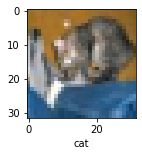

In [21]:
plot_sample(X_test, y_test, 0)

In [22]:
resim_siniflari[y_predictions_siniflari[0]]

'cat'

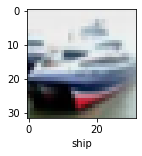

In [23]:
plot_sample(X_test, y_test, 1)

In [24]:
resim_siniflari[y_predictions_siniflari[1]]

'ship'

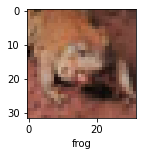

In [25]:
plot_sample(X_test, y_test, 5)

In [26]:
resim_siniflari[y_predictions_siniflari[5]]

'frog'